# Demo: fetching positions of S-MODE in-situ assets

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from tools.config import OPSAREA, MAPEXTENT

In [30]:
# B. Greenwood is pushing hourly the positions of all assets to a table http://smode.whoi.edu/index.php/insitu/
# We can fetch the json file with pandas:
assets = pd.read_json('http://smode.whoi.edu/status.php?format=json')

In [31]:
assets

,type,sn,last_updated,latitude,longitude
0,APL Float,0,2021-06-22 23:14:42,47.655100,-122.317300
1,APL Float,81,2021-06-25 19:17:08,47.653600,-122.319800
2,APL Float,82,2021-06-25 18:17:06,47.665200,-122.397500
3,APL Float,83,2021-09-11 19:53:47,47.737300,-122.396300
4,APL Float,92,2021-05-29 20:12:02,48.991100,-14.811500
5,APL Float,93,2020-07-27 22:08:16,33.728800,-145.906600
6,drifter,0-4421166,2021-04-15 19:34:29,33.204300,-117.306000
7,drifter,0-4421176,2021-04-15 20:56:15,33.204300,-117.306100
8,drifter,300234064739060,2021-07-16 12:00:26,33.585600,-117.230100
9,navo_glider,NG231,2021-10-06 09:53:54,37.755100,-124.027110


### Quick plot: current position of all in-situ assets

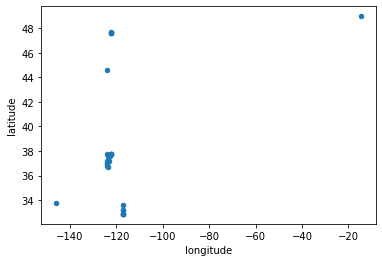

In [32]:
assets.plot.scatter(x='longitude', y='latitude')

### Quick plot 2: current positino of a single type of asset

Text(0.5, 1.0, 'navo_glider')

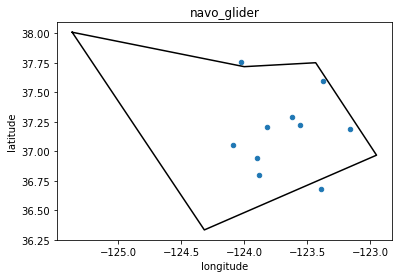

In [51]:
# Plot a single type of asset
asset_type = 'navo_glider'

fig, ax = plt.subplots()

assets.where(assets.type==asset_type).\
                    plot.scatter(x='longitude',
                                 y='latitude',
                                 ax = ax)


ax.plot(OPSAREA['longitude'],OPSAREA['latitude'],'k')
ax.set_title(asset_type)